# Business Understanding

Vaccines are crutial in many ways but most importantly because they can prevent or reduce the severity of many infectious diseases that can cause serious illness, disability, or death. By vaccinating a large proportion of the population, the spread of the disease can be slowed down or stopped, which protects not only the vaccinated individuals but also those who are not vaccinated or cannot be vaccinated due to medical reasons, through herd immunity. Vaccines are one of the most effective and cost-effective public health interventions that have saved millions of lives and improved the quality of life for many more.

The business problem I wanting to solve is can we predict who will recieve the H1N1 vaccine given information that was collected from the National 2009 H1N1 Flu Survey (NHFS). I also want to make recommendations to Pfizer on how they can maximize the number of people to get vaccinated in the future.

# Data Understanding

The National 2009 H1N1 Flu Survey (NHFS) was sponsored by the National Center for Immunization and Respiratory Diseases (NCIRD) and conducted jointly by NCIRD and the National Center for Health Statistics (NCHS), Centers for Disease Control and Prevention (CDC). The NHFS was a list-assisted random-digit-dialing telephone survey of households, designed to monitor influenza immunization coverage in the 2009-10 season.

The target population for the NHFS was all persons 6 months or older living in the United States at the time of the interview. Data from the NHFS were used to produce timely estimates of vaccination coverage rates for both the monovalent pH1N1 and trivalent seasonal influenza vaccines.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
features = pd.read_csv('data/training_set_features.csv', index_col="respondent_id")
features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
labels = pd.read_csv('data/training_set_labels.csv', index_col="respondent_id")
labels.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

In [5]:
features.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [6]:
print(labels.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB
None


In [7]:
labels.describe()

,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000
mean,0.212454,0.465608
std,0.409052,0.498825
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [8]:
#This is to make sure that the two datasets match before I combined them

np.testing.assert_array_equal(features.index.values, labels.index.values)

## Data Preparation

After exploring the datasets, I thought the best approach would be to join the two together. That way I can look to see how how each variable correlates to whether or not a person got the vaccine and then further prep the data for analysis all together.

In [9]:
#this is to join the two datasets together
df = features.join(labels)
print(df.shape)

df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [10]:
#Seeing which fields most strongly correlate to the H1N1 Vaccine

df.corr(numeric_only=True)["h1n1_vaccine"]

h1n1_concern                   0.121929
h1n1_knowledge                 0.117951
behavioral_antiviral_meds      0.040608
behavioral_avoidance           0.047690
behavioral_face_mask           0.070498
behavioral_wash_hands          0.074712
behavioral_large_gatherings    0.017822
behavioral_outside_home        0.021768
behavioral_touch_face          0.071648
doctor_recc_h1n1               0.393890
doctor_recc_seasonal           0.209864
chronic_med_condition          0.095207
child_under_6_months           0.066962
health_worker                  0.169768
health_insurance               0.121170
opinion_h1n1_vacc_effective    0.269347
opinion_h1n1_risk              0.323265
opinion_h1n1_sick_from_vacc    0.075091
opinion_seas_vacc_effective    0.179272
opinion_seas_risk              0.258571
opinion_seas_sick_from_vacc    0.008360
household_adults               0.007545
household_children            -0.003320
h1n1_vaccine                   1.000000
seasonal_vaccine               0.377143


In [11]:
#Seeing which fields most strongly correlate to the Seasonal Vaccine

df.corr(numeric_only=True)["seasonal_vaccine"]

h1n1_concern                   0.154828
h1n1_knowledge                 0.120152
behavioral_antiviral_meds      0.006277
behavioral_avoidance           0.076395
behavioral_face_mask           0.050083
behavioral_wash_hands          0.112414
behavioral_large_gatherings    0.064025
behavioral_outside_home        0.053509
behavioral_touch_face          0.120228
doctor_recc_h1n1               0.198607
doctor_recc_seasonal           0.369190
chronic_med_condition          0.170174
child_under_6_months           0.012097
health_worker                  0.127311
health_insurance               0.200858
opinion_h1n1_vacc_effective    0.205072
opinion_h1n1_risk              0.216625
opinion_h1n1_sick_from_vacc    0.027404
opinion_seas_vacc_effective    0.361875
opinion_seas_risk              0.390106
opinion_seas_sick_from_vacc   -0.061510
household_adults              -0.064840
household_children            -0.114614
h1n1_vaccine                   0.377143
seasonal_vaccine               1.000000


In [12]:
#cleaning the dataset and removing columns that are not relevant or did not have useful information

df.drop(['employment_industry','census_msa','hhs_geo_region', 'employment_occupation', 'household_adults', 'household_children'], axis = 1, inplace = True)
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,0,0


# Exploratory Data Analysis

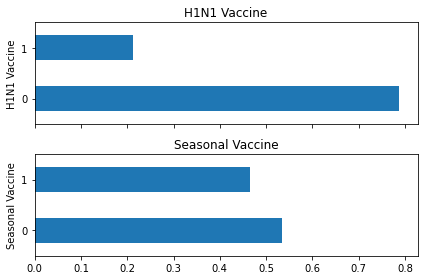

In [13]:
# I wanted to see the proportions of people getting the vaccines versus not getting the vaccines

fig, ax = plt.subplots(2, 1, sharex=True)

labels_bar = labels.shape[0]

(labels['h1n1_vaccine']
    .value_counts()
    .div(labels_bar)
    .plot.barh(title="H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("H1N1 Vaccine")

(labels['seasonal_vaccine']
    .value_counts()
    .div(labels_bar)
    .plot.barh(title="Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("Seasonal Vaccine")

fig.tight_layout()

In [14]:
#Creating integer dummy variables for the string categorical 
#values so that the data can be included in the model with the other fields

df = pd.get_dummies(df, columns=['age_group','education', 'race', 'sex', 'income_poverty', 'marital_status',
                                           'rent_or_own', 'employment_status'], dtype=int)
df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,0,1,1,0,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,1,0,1,0,1,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1,0,0,0,1,1,0,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1,1,0,0,1,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,0,1,1,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,1,0,0,0,0


In [15]:
#Filling the NaN values with 'mode' 

df = df.fillna(df.mode().iloc[0])

In [16]:
df.isna().sum()

h1n1_concern                                0
h1n1_knowledge                              0
behavioral_antiviral_meds                   0
behavioral_avoidance                        0
behavioral_face_mask                        0
behavioral_wash_hands                       0
behavioral_large_gatherings                 0
behavioral_outside_home                     0
behavioral_touch_face                       0
doctor_recc_h1n1                            0
doctor_recc_seasonal                        0
chronic_med_condition                       0
child_under_6_months                        0
health_worker                               0
health_insurance                            0
opinion_h1n1_vacc_effective                 0
opinion_h1n1_risk                           0
opinion_h1n1_sick_from_vacc                 0
opinion_seas_vacc_effective                 0
opinion_seas_risk                           0
opinion_seas_sick_from_vacc                 0
h1n1_vaccine                      

In [17]:
concern = (df
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
concern

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8178,2489
3.0,3250,1341


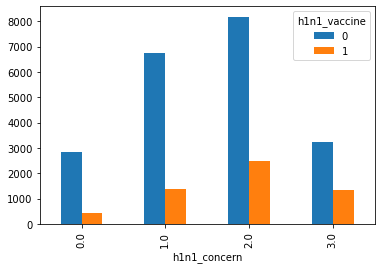

In [18]:
concern.plot.bar()
plt.show()

In [19]:
#prepping the dataset for the train test split
X = df.drop("h1n1_vaccine", axis=1)
y = df["h1n1_vaccine"]

X

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,0,1,1,0,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,1,0,1,0,1,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1,1,0,0,1,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,0,1,1,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,1,0,0,0,0


In [20]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=123)

# Modeling

After putting the data through the train/test split, I am going to start modeling by running baseline models first. I want to see how the data performs before any tuning and see how I can later improve the model by running a grid search.

In [21]:
tree_baseline = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=100) 
tree_baseline.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=100)

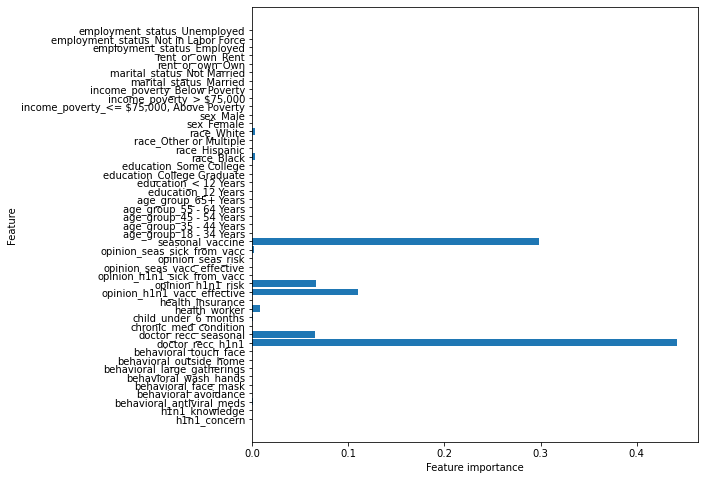

In [22]:
#Defining the funtion to show the features that are most used in the model

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_baseline)

In [23]:
#looking at how the model performs overall but focusing on precision

tree_baseline_predict = tree_baseline.predict(X_test)

print(confusion_matrix(y_test, tree_baseline_predict))
print(classification_report(y_test, tree_baseline_predict))

[[4857  356]
 [ 703  761]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5213
           1       0.68      0.52      0.59      1464

    accuracy                           0.84      6677
   macro avg       0.78      0.73      0.75      6677
weighted avg       0.83      0.84      0.83      6677



In [24]:
print('Testing Accuracy for Decision Tree Classifier: {:.4}%'.format(accuracy_score(y_test, tree_baseline_predict) * 100))

Testing Accuracy for Decision Tree Classifier: 84.14%


In [25]:
#logistic regression baseline model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [26]:
y_log_train = logreg.predict(X_train)

train_residuals = np.abs(y_train - y_log_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    17083
1     2947
Name: count, dtype: int64

Residuals (proportions)
0    0.852871
1    0.147129
Name: proportion, dtype: float64


In [27]:
y_log_test = logreg.predict(X_test)

test_residuals = np.abs(y_test - y_log_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    5659
1    1018
Name: count, dtype: int64

Residuals (proportions)
0    0.847536
1    0.152464
Name: proportion, dtype: float64


In [28]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) 

y_log_test

print("")
df.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')



,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,0,1,1,0,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,1,0,1,0,1,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,1,0,1,0,1,0,0


In [29]:
#ROC Curve

from sklearn.metrics import roc_curve, auc

y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.8706132420105684


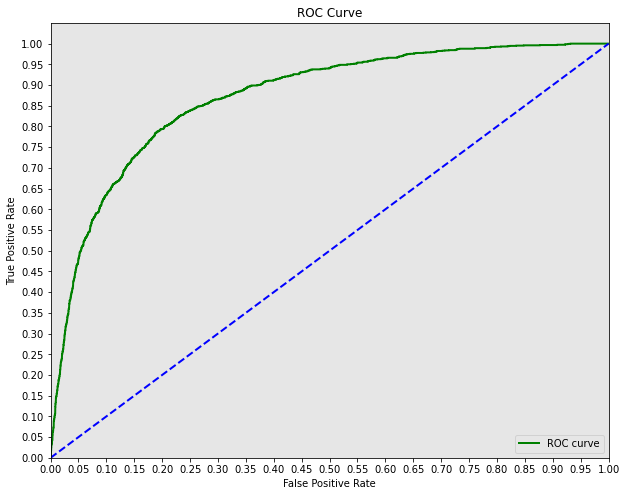

In [30]:
#ROC Curve

import seaborn as sns
%matplotlib inline

sns.set_style({'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
#since the decision tree performed well, I am now doing a random forest classifier

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5, random_state=222)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=222)

In [32]:
forest_predict = forest.predict(X_train)

print(confusion_matrix(y_train, forest_predict))
print(classification_report(y_train, forest_predict))

[[15569   251]
 [ 3129  1081]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     15820
           1       0.81      0.26      0.39      4210

    accuracy                           0.83     20030
   macro avg       0.82      0.62      0.65     20030
weighted avg       0.83      0.83      0.79     20030



In [33]:
forest_predict = forest.predict(X_test)

print(confusion_matrix(y_test, forest_predict))
print(classification_report(y_test, forest_predict))

[[5123   90]
 [1127  337]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      5213
           1       0.79      0.23      0.36      1464

    accuracy                           0.82      6677
   macro avg       0.80      0.61      0.63      6677
weighted avg       0.81      0.82      0.78      6677



In [34]:
#setting up parameters to perform a grid search

rf_param_grid = {
    "n_estimators": [10, 20, 30, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 6, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [3, 6],
}

In [35]:
forest.fit(X_train, y_train)
print('Random Forest Training Data:', forest.score(X_train, y_train))

Random Forest Training Data: 0.8312531203195207


In [36]:
print('Random Forest Test Data:', forest.score(X_test, y_test))

Random Forest Test Data: 0.8177325146023663


In [37]:
#here are the best parameters for the random forest according the grid search

rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")


Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [38]:
#adjusted Random Forest Classifer with the new parameters
adjusted_forest = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=None, 
                                         random_state=222, min_samples_leaf=3, min_samples_split=5)
adjusted_forest.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=5,
                       random_state=222)

In [39]:
adjusted_forest_predict = adjusted_forest.predict(X_train)

print(confusion_matrix(y_train, adjusted_forest_predict))
print(classification_report(y_train, adjusted_forest_predict))

[[15567   253]
 [ 1507  2703]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     15820
           1       0.91      0.64      0.75      4210

    accuracy                           0.91     20030
   macro avg       0.91      0.81      0.85     20030
weighted avg       0.91      0.91      0.91     20030



In [40]:
adjusted_forest_predict = adjusted_forest.predict(X_test)

print(confusion_matrix(y_test, adjusted_forest_predict))
print(classification_report(y_test, adjusted_forest_predict))

[[4989  224]
 [ 816  648]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5213
           1       0.74      0.44      0.55      1464

    accuracy                           0.84      6677
   macro avg       0.80      0.70      0.73      6677
weighted avg       0.83      0.84      0.83      6677



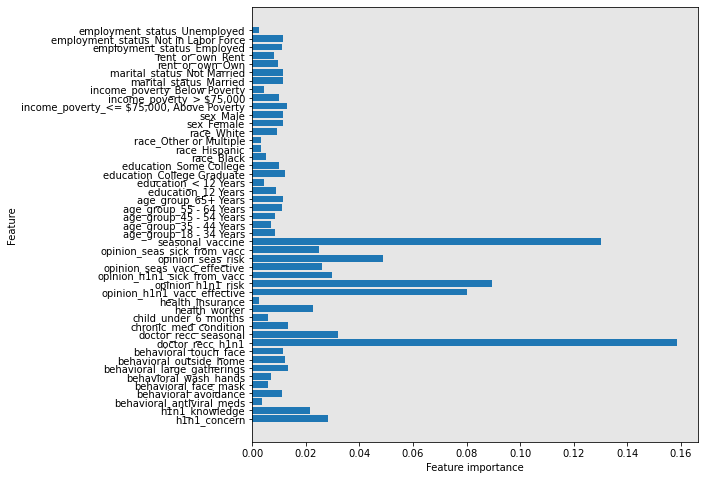

In [41]:
plot_feature_importances(adjusted_forest)

In [42]:
#the confusion matrix for the final model

cnf_matrix = confusion_matrix(y_test, adjusted_forest_predict)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[4989  224]
 [ 816  648]]


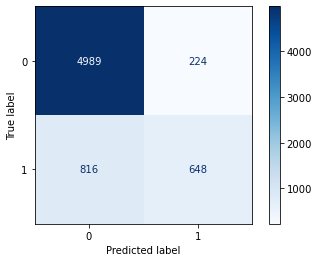

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)

# Evaluation

# Limitations

# Recommendations

# Next Steps